In [1]:
"""
# download ready train, valid and test datasets
!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/train.zip
!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/valid.zip
!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/test.zip

# create a data directory for the images
!mkdir /home/u38515/data

# unzip the downloaded data into the data directory
!unzip train.zip -d data/
!unzip valid.zip -d data/
!unzip test.zip -d data/
"""

'\n# download ready train, valid and test datasets\n!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/train.zip\n!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/valid.zip\n!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/test.zip\n\n# create a data directory for the images\n!mkdir /home/u38515/data\n\n# unzip the downloaded data into the data directory\n!unzip train.zip -d data/\n!unzip valid.zip -d data/\n!unzip test.zip -d data/\n'

In [1]:
%matplotlib inline

import os
import os.path as path
import random
import torch
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.utils as utils
import matplotlib.pyplot as plt
import numpy as np

random_seed = 99
torch.manual_seed(random_seed)
print("Manaul Seed:",random_seed)

Manaul Seed: 99


In [2]:
data_dir = 'data/'
train_dir = data_dir+'train'
valid_dir = data_dir+'valid'
test_dir = data_dir+'test'
workers = 2
n_epochs = 5

In [3]:
def imageloader(root, workers, train=True):
    """
    Returns loader for data in root.
    """
    if train:
        transform = transforms.Compose([
            transforms.Resize(244),
            transforms.CenterCrop((224, 224)),
            transforms.ToTensor(),
            # necessary step for transfer learning
            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                 std=[0.229, 0.224, 0.225])
        ])
    # train set to false to testing without too much augmentation
    # specifically normalization
    else:
        transform = transforms.Compose([
            transforms.Resize(244),
            transforms.CenterCrop((224, 224)),
            transforms.ToTensor()
        ])
    # dataset and loader
    dataset = dset.ImageFolder(root, transform=transform)
    dataloader = data.DataLoader(dataset, batch_size=64, shuffle=True, num_workers=workers)
    
    return dataloader

In [4]:
trainloader = imageloader(train_dir, workers)

In [5]:
validloader = imageloader(valid_dir, workers)

In [6]:
testloader = imageloader(test_dir, workers, train=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


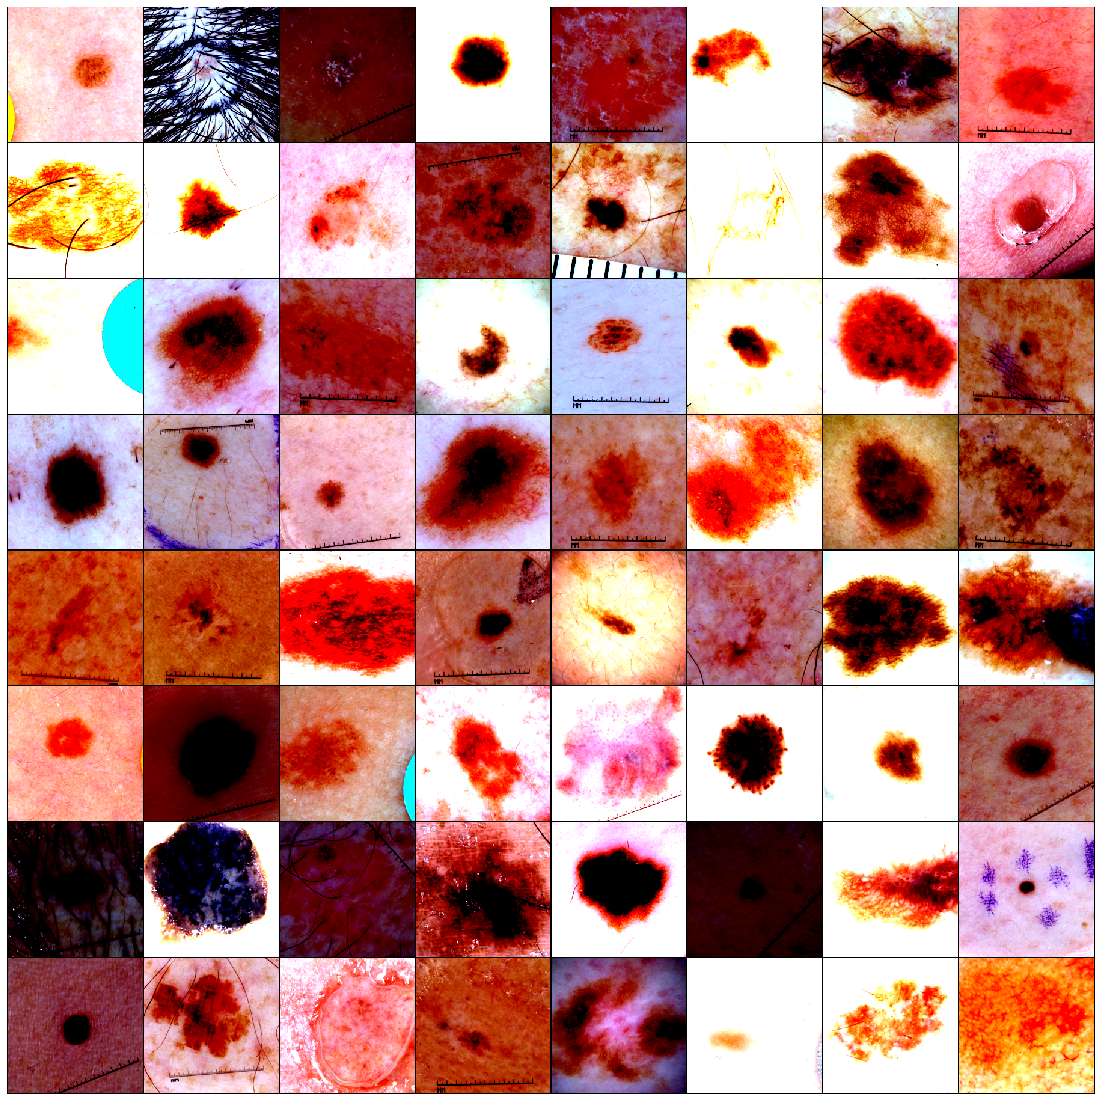

In [7]:
"""
Data Visualization.
"""
dataiter = iter(trainloader)
images, labels = next(dataiter)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(np.transpose(utils.make_grid(images), (1,2,0)))

In [8]:
images.size()

torch.Size([64, 3, 224, 224])

In [9]:
"""
Loading the model.
I'll be using the pretrained VGG16 network.
"""
model = models.vgg16(pretrained=True)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [10]:
"""
Since my data is small and also different from the ImageNet dataset,
I'll apply case two type of transfer learning.
"""
model.features = nn.Sequential(*list(model.features.children())[:-3])
model.classifier = nn.Sequential(*[nn.Linear(25088, 4096), nn.ReLU(inplace=True),
                                   nn.Dropout(p=.5), nn.Linear(4096, 3)])

model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [11]:
def weight_intialization(m):
    """
    Randomly initilaize the weights of the classifier
    """
    classifier = m.__class__.__name__
    if classifier.find('Linear') != -1:
            n = m.in_features
            y = 1.0/np.sqrt(n)
            m.weight.data.uniform_(-y, y)
            m.bias.data.fill_(0)

In [12]:
model.classifier.apply(weight_intialization)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=3, bias=True)
)

In [13]:
"""
Freeze the feature weights of the pretrained network.
"""
for param in model.features.parameters():
    param.requires_grad = False

In [14]:
"""
Train the classifier
"""
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.0007)

In [16]:
trainlosses = []
vallosses = []

val_Inf = np.Inf

for epoch in range(n_epochs+1):
    train_loss = 0
    valid_loss = 0
    
    model.train()
    for batch_idx, (images, labels) in enumerate(trainloader):
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss  = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        
    model.eval()
    for batch_idx, (images, labels) in enumerate(validloader):
        output = model(images)
        loss = criterion(output, labels)
        valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        
    trainlosses.append(train_loss)
    vallosses.append(valid_loss)
    
    if batch_idx % 50 == 0:
        print(f"Epoch: {epoch}, Train Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}")
        if valid_loss < val_Inf:
            print("Loss Decreased, Saving State .....")
            torch.save(model.state_dict(), "checkpoint.pt")
            val_Inf = valid_loss

Traceback (most recent call last):
Traceback (most recent call last):
  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/multiprocessing/util.py", line 262, in _run_finalizers
    finalizer()
  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/multiprocessing/util.py", line 262, in _run_finalizers
    finalizer()
  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/shutil.py", line 486, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/shutil.py", line 444, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  F

  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/shutil.py", line 442, in _rmtree_safe_fd
    os.unlink(name, dir_fd=topfd)
  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/shutil.py", line 442, in _rmtree_safe_fd
    os.unlink(name, dir_fd=topfd)
OSError: [Errno 16] Device or resource busy: '.nfs00000000803ace370000018e'
OSError: [Errno 16] Device or resource busy: '.nfs00000001001cda2b0000018d'
Traceback (most recent call last):
  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/multiprocessing/util.py", line 262, in _run_finalizers
    finalizer()
Traceback (most recent call last):
  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/multiprocessing/util.py", line 262, in _run_finalizers
    finalizer()
  File "/glob/intel-python/version

OSError: [Errno 16] Device or resource busy: '.nfs000000090146682200000197'
Traceback (most recent call last):
  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/multiprocessing/util.py", line 262, in _run_finalizers
    finalizer()
  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/shutil.py", line 486, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/shutil.py", line 444, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/glob/intel-python/versions/2019u2/intelpython3/lib/python3.6/shutil.py", line 442, in _rmtree_safe_fd
    os.unlink(name, dir_fd=topfd)
OSError: [Errno 16] Device or resource busy: '.nfs000000088000245800000198'
Traceback (most recent call last):
  File "/glob/intel